In [1]:
# warning 무시
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pylab as plt
from matplotlib import font_manager
import matplotlib.font_manager as fm
# '-' 깨짐 해결 모듈
import matplotlib as mpl

plt.rcParams["font.family"] = "Malgun Gothic"  # For Windows
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (8,4)
print(plt.rcParams["font.family"])

# 마이너스 깨짐 해결
mpl.rcParams["axes.unicode_minus"] = False

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from bs4 import BeautifulSoup
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

from konlpy.tag import Okt
from collections import Counter
from konlpy.tag import Komoran
from nltk.tokenize import word_tokenize
from nltk import FreqDist
from nltk.corpus import stopwords
from wordcloud import WordCloud



import numpy as np
import pandas as pd
import pandas as pd
import requests
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

['Malgun Gothic']


In [2]:
test = pd.read_csv('Project_data/data2/cwn.csv')

In [3]:
test['news_date'].value_counts().sort_index()

news_date
2022-05-31    10
2022-06-01     1
2022-06-02     9
2022-06-03    11
2022-06-06     4
              ..
2023-05-24     2
2023-05-25     3
2023-05-26     3
2023-05-30     5
2023-05-31     6
Name: count, Length: 284, dtype: int64

In [4]:
# 새로운 CSV 파일 경로 및 이름
test_file = 'Project_data/data2/요즘IT.CSV'

# 데이터프레임을 새로운 CSV 파일로 저장
test.to_csv(test_file, index=False)

In [5]:
test_df = pd.read_table('Project_data/data2/요즘IT.CSV', sep=',')
test_df

,news_date,news_title,news_text_sm,url_in,news_writer,tags_string,thumb_addr
0,2023-05-31,인기 안드로이드 앱 사용자 몰래 감시한 사실 뒤늦게 드러나,테크크런치 데일리메일 등 복수 외신은 사이버 보안 기업 이셋(ESET)의 조사 결과...,https://www.cwn.kr/news/articleView.html?idxno...,최은희,"#안드로이드,#안드로이드 앱,#멀웨어,#감시,#사이버 공격,#사이버 보안",https://www.cwn.kr/news/thumbnail/202305/16894...
1,2023-05-31,AI에게서 내 개인정보를 보호한다… 대학생이 개발한 AI 정보보호 서비스 ‘챗큐리티...,‘챗큐리티’가 데이터 검사를 진행하는 모습챗GPT(ChatGPT)나 구글 바드(Ba...,https://www.cwn.kr/news/articleView.html?idxno...,온라인뉴스팀,"#AI 정보보호 솔루션,#챗큐리티,#AI,#인공지능,#민감 정보 검사,#정보 보호,...",https://www.cwn.kr/news/thumbnail/202305/mn_16...
2,2023-05-31,“인공지능이 인류 종말 초래할 것”…전문가 집단 규제 촉구 공개서한 서명,30일(현지 시각) BBC 데일리메일 가디언 등 복수 외신은 테크 업계 전문가 35...,https://www.cwn.kr/news/articleView.html?idxno...,박채원,"#인공지능,#AI,#AI 규제,#챗GPT,#오픈AI,#샘 알트만",https://www.cwn.kr/news/thumbnail/202305/16888...
3,2023-05-31,뷰티 외식 브랜드 ‘엠제이부티끄’ 블록체인 프로젝트 시카(CHICA) 출시 ‘엘뱅크...,뷰티 외식 브랜드 마케팅 기업 엠제이부티끄㈜(MJ BOUTIQUE Co Ltd)가 ...,https://www.cwn.kr/news/articleView.html?idxno...,김지영,NaN,https://www.cwn.kr/news/thumbnail/202305/16887...
4,2023-05-31,플리토 생성형 AI 접목한 차세대 번역기 ‘플리토 AI ’ 베타 출시,플리토 생성형 AI 접목한 차세대 번역기 ‘플리토 AI ’ 베타 출시언어 데이터 및...,https://www.cwn.kr/news/articleView.html?idxno...,온라인뉴스팀,"#플리토,#플리토 AI 플러스,#인공지능,#AI,#AI 번역",https://www.cwn.kr/news/thumbnail/202305/mn_16...
...,...,...,...,...,...,...,...
1656,2022-05-31,"싱가포르 기업 84% ""코딩 실력 있는 지원자 선호해""",마카오 비즈니스닷컴이 싱가포르 평생 교육 기관 NTUC 러닝허브(NTUC Learn...,https://www.cwn.kr/news/articleView.html?idxno...,임온유,"#코딩 실력,#테크 분야 취업",https://www.cwn.kr/news/thumbnail/202205/10260...
1657,2022-05-31,IBM 맥도날드 AI 드라이브 스루 챗봇에 자연어 처리 기반 주문 기능 추가,영국 온라인 매체 더레지스터에 따르면 IBM이 맥도날드 인공지능(AI) 드라이브 스...,https://www.cwn.kr/news/articleView.html?idxno...,고다솔,"#IBM,#맥도날드,#AI 챗봇,#드라이브 스루,#자연어 처리",https://www.cwn.kr/news/thumbnail/202205/10268...
1658,2022-05-31,印 델리 AI 기반 교통관리 시스템 배포 예고,인도 테크 매체 애널리틱스 인디아 매거진에 따르면 델리 교통국(Delhi Traff...,https://www.cwn.kr/news/articleView.html?idxno...,임온유,"#델리 교통국,#ITMS,#AI,#인공지능,#교통 신호",https://www.cwn.kr/news/thumbnail/202205/10256...
1659,2022-05-31,프라다 명품 브랜드의 디지털 자산 발행 행렬 동참…타임캡슐 NFT 런칭 예고,출처: Prada구찌 발망 발렌시아가 등에 이어 프라다도 명품 브랜드의 NFT 발행...,https://www.cwn.kr/news/articleView.html?idxno...,이선영,"#프라다,#NFT,#이더리움,#타임캡슐,#카시우스 허스트,#오로라 블록체인 컨소시엄",https://www.cwn.kr/news/thumbnail/202205/10257...


In [6]:
okt = Okt()

In [7]:
data = pd.read_csv('Project_data/data2/요즘IT.CSV', encoding='UTF-8')
data = data['news_title'][:15]
data = data.to_list()
data = ' ' .join(data)

In [8]:
noun_data = okt.nouns(data)

In [9]:
count_noun_data = Counter(noun_data)
filtered_count_noun_data = {word: count for word, count in count_noun_data.items() if count >= 2}

In [10]:
# 데이터프레임에서 '제목' 열의 모든 텍스트를 하나의 문자열로 결합
text = ' '.join(test_df['news_title'])

# Komoran 형태소 분석기 초기화
komoran = Komoran()

# 텍스트 토큰화 및 형태소 분석
tokens = word_tokenize(text)
pos_tags = komoran.pos(text)

# 불용어 파일 읽기
stop_words = []
with open('Project_data/data/불용.txt', 'r', encoding='utf-8') as file:
    stop_words = file.read().splitlines()

# 단어 등장 횟수를 저장할 딕셔너리 초기화
word_counts = {}

# 데이터프레임을 순회하며 날짜별로 단어 등장 횟수 집계
for text, date in zip(test_df['news_title'], test_df['news_date']):
    # 텍스트 토큰화 및 형태소 분석
    tokens = word_tokenize(text)
    pos_tags = komoran.pos(text)
    
    # 년도, 월, 일 추출
    year, month, day = date[:-1].split('-')
    
    # 날짜를 합친 형식으로 표시
    full_date = f"{year}-{month}-{day}"
    
    # 불용어 제거 및 명사 추출
    filtered_tokens = [token for token in tokens if token not in stop_words]
    nouns = [token for token, pos in pos_tags if pos.startswith('N')]
    
    # 하루에 하나의 태그만 추출
    if full_date in word_counts:
        continue
    else:
        word_counts[full_date] = nouns

# 가장 많이 언급된 단어 추출
top_words_limit = 1
top_words = []
for date, words in word_counts.items():
    word_count = {}
    for word in words:
        word_count[word] = word_count.get(word, 0) + 1
    
    sorted_words = sorted(word_count.items(), key=lambda x: x[1], reverse=True)
    
    # 상위 단어 추출
    if sorted_words:
        top_word = sorted_words[0][0]
        top_words.append((date, top_word))

# 추출된 단어를 데이터프레임으로 변환
result_df = pd.DataFrame(top_words, columns=['Date', 'Tag'])

# 데이터프레임을 CSV 파일로 저장
result_df.to_csv('추출된_태그5.csv', index=False)

print(result_df)

         Date        Tag
0   2023-05-3         인기
1   2023-05-2         기술
2   2023-05-1       에이수스
3   2023-05-0         외신
4   2023-04-2        체지방
5   2023-04-1          폴
6   2023-04-0          뉴
7   2023-03-3        우분투
8   2023-03-2          일
9   2023-03-1          업
10  2023-03-0        덕덕고
11  2023-02-2         해외
12  2023-02-1       슈퍼모델
13  2023-02-0         코드
14  2023-01-3         머리
15  2023-01-2     [챗GPT에
16  2023-01-1          코
17  2023-01-0      우크라이나
18  2022-12-3        배터리
19  2022-12-2         애플
20  2022-12-1       스트리밍
21  2022-12-0         테크
22  2022-11-3        파산법
23  2022-11-2       아프리카
24  2022-11-1      암스테르담
25  2022-11-0       바이낸스
26  2022-10-3         홍콩
27  2022-10-2          알
28  2022-10-1       블록체인
29  2022-10-0         케냐
30  2022-09-3        크립토
31  2022-09-2       바이낸스
32  2022-09-1      인스타그램
33  2022-09-0         기업
34  2022-08-3         연말
35  2022-08-2        투자자
36  2022-08-1         바실
37  2022-08-0         케냐
38  2022-07-3  사파리콤·코드리스


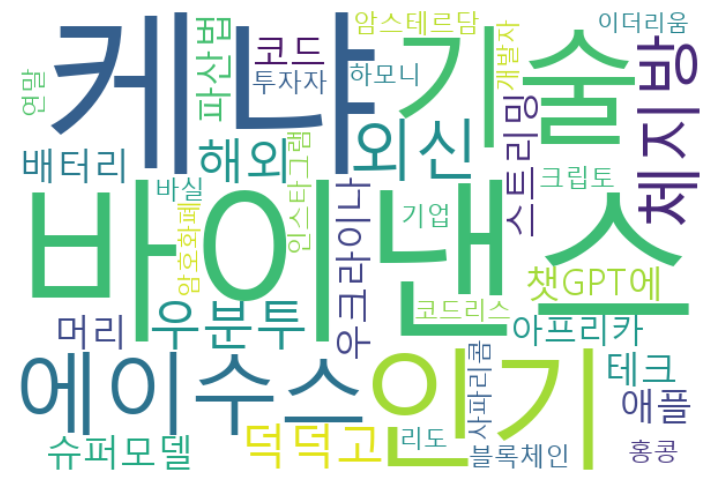

In [11]:
import re

# 폰트 설정
# font_prop = font_manager.FontProperties(fname=font_path)
# plt.rcParams['font.family'] = font_prop.get_name()

# 폰트 사이즈 설정
plt.rcParams['font.size'] = 12

# CSV 파일 불러오기
dataframe = pd.read_csv('추출된_태그5.csv')

# 텍스트 데이터 추출 및 전처리
text_data = ' '.join(dataframe['Tag'])
# 2글자 이상의 단어만 추출
text_data = ' '.join(re.findall(r'\b\w{2,}\b', text_data))

# 워드클라우드 생성
wordcloud = WordCloud(width=600, height=400, font_path='Project_data/data/malgun.ttf',background_color='white').generate(text_data)

# 워드클라우드 시각화
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# plt.savefig('test.png')